# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [210]:
import pandas as pd 
data = pd.read_csv('../your-code/data.csv',nrows=200000)
data = data.sample(n=200000, replace = 'True')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
68381,9,CASH_OUT,62173.93,C266197257,0.00,0.00,C1383446722,1223818.33,1842410.62,0,0
57389,9,PAYMENT,21296.58,C1199629425,3721756.98,3700460.39,M57151879,0.00,0.00,0,0
112765,11,CASH_OUT,16474.46,C2104895719,472.00,0.00,C237594516,2441458.12,3253574.67,0,0
145921,11,CASH_IN,296912.16,C150313334,19561752.97,19858665.13,C353292294,989825.00,493943.55,0,0
170022,12,CASH_OUT,26743.78,C1027583845,6718.00,0.00,C895339976,0.00,26743.78,0,0


In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 68381 to 150639
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            200000 non-null  int64  
 1   type            200000 non-null  object 
 2   amount          200000 non-null  float64
 3   nameOrig        200000 non-null  object 
 4   oldbalanceOrg   200000 non-null  float64
 5   newbalanceOrig  200000 non-null  float64
 6   nameDest        200000 non-null  object 
 7   oldbalanceDest  200000 non-null  float64
 8   newbalanceDest  200000 non-null  float64
 9   isFraud         200000 non-null  int64  
 10  isFlaggedFraud  200000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 18.3+ MB


In [213]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000,200000.0
mean,10.066720,1.816130e+05,8.882458e+05,9.065910e+05,9.410728e+05,1.190310e+06,0.000735,0.0
std,2.118009,3.295849e+05,2.788686e+06,2.826056e+06,2.355666e+06,2.632848e+06,0.027101,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.210399e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.974100e+04,1.930750e+04,0.000000e+00,5.148693e+04,1.355940e+05,0.000000,0.0
75%,12.000000,2.300638e+05,1.946762e+05,2.305194e+05,7.723088e+05,1.195458e+06,0.000000,0.0
max,13.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000,0.0


In [214]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [215]:
data.rename(columns={'step': 'Time', 
                     'type': 'Transaction_type',
                     'amount': 'Amount',
                     'nameOrig':'Origin',
                     'oldbalanceOrg':'Origin_Balance_1', 
                     'newbalanceOrig':'Origin_Balance_2',
                     'nameDest':'Recipient_Type',
                     'oldbalanceDest':'Recipient_Balance_1',
                     'newbalanceDest':'Recipient_Balance_2',
                     'isFraud':'Fraud',
                     'isFlaggedFraud':'Fraud_Flagged',
                    }, inplace=True)

In [216]:
columns_list = data.columns.tolist()
columns_list # The column names were succesfully changed. 

['Time',
 'Transaction_type',
 'Amount',
 'Origin',
 'Origin_Balance_1',
 'Origin_Balance_2',
 'Recipient_Type',
 'Recipient_Balance_1',
 'Recipient_Balance_2',
 'Fraud',
 'Fraud_Flagged']

### Data Explanation 

Understanding the set:
1) (i)Step - maps a unit of time in the real world. 
In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

2) Other Labels: 
(ii) Type, (iii)Amount, (iv)NameOrig (v) oldbalanceOrg (vi) newbalanceOrig (vii) nameDest (viii)oldbalanceDest (ix) newbalanceDest (x) isFraud (xi) isFlaggedFraud

### What is the distribution of the outcome? 

In [188]:
import seaborn as sns
sns.pairplot(data) 

In [ ]:
"""
No relevant information from the pairplot. 
"""

In [231]:
print("The actual Fraud detected")
data['Fraud'].value_counts()

The actual Fraud detected


0    199853
1       147
Name: Fraud, dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [12]:
"""
Since there is no reference to timestamp() it is not possible to chage the unit steps to days. It will be 
possible to change one hour or one step to 0.04 days but will not add any value. I suggest we keep the 
steps as an indicator or occurance of a particular instance. 

Could I groupby day ? 
"""

'\nSince there is no reference to timestamp() it is not possible to chage the unit steps to days. It will be \npossible to change one hour or one step to 0.04 days but will not add any value. I suggest we keep the \nsteps as an indicator or occurance of a particular instance. \n\nCould I groupby day ? \n'

False

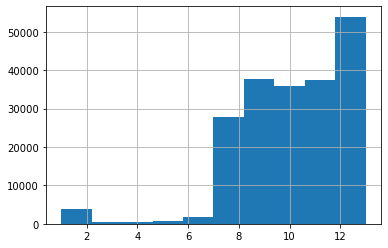

In [218]:
data['Time'].hist()
data['Time'].value_counts() #Exploring the number of transactions per Time Stamp
data.isnull().values.any() #False
data.isna().values.any() #False

In [201]:
#Answering the question above, what is the distributionn of the Outcome. 
data['Fraud'].value_counts() #99% of the Data shows that transactions are non-fraudelent

0    199845
1       155
Name: Fraud, dtype: int64

In [190]:
#Cleaning Data Set 

In [219]:
data.drop(columns = ['Fraud_Flagged'],inplace = True)

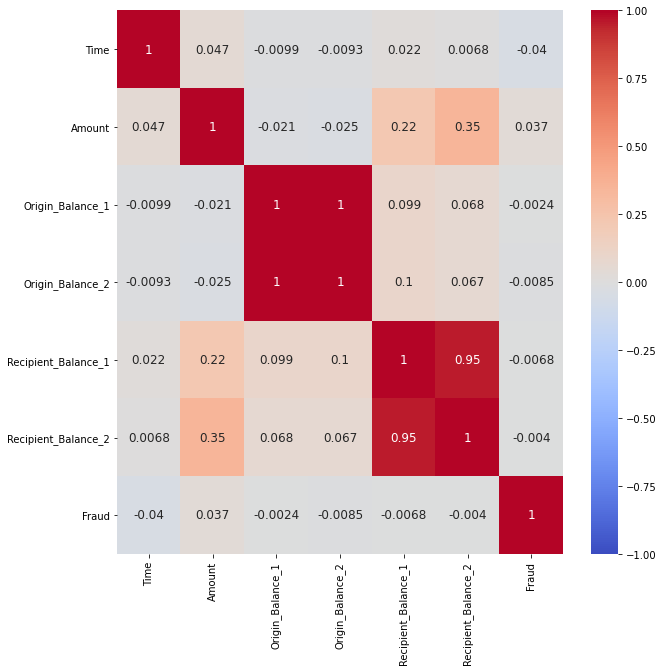

In [221]:
import matplotlib.pyplot as plt
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(corr,annot = True, vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',annot_kws={'size':12}) 


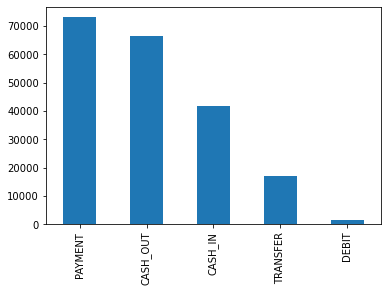

In [225]:
data['Transaction_type']& (data["Fraud"] == 1.value_counts().plot(kind='bar')

In [235]:
data.groupby(['Transaction_type']).sum() 
#data.loc[(data['Transaction_type']) & (data["Fraud"] == 1)].sum()

,Time,Amount,Origin_Balance_1,Origin_Balance_2,Recipient_Balance_1,Recipient_Balance_2,Fraud,Merchant-Recipient
Transaction_type,,,,,,,,
CASH_IN,423422,7.583014e+09,1.585671e+11,1.661465e+11,6.048689e+10,6.290661e+10,0,0.0
CASH_OUT,689571,1.353329e+10,5.656352e+09,3.321066e+09,9.031154e+10,1.175057e+11,79,0.0
DEBIT,14079,1.738739e+07,1.950767e+08,1.847762e+08,1.611821e+09,1.852816e+09,0,0.0
PAYMENT,717111,8.847724e+08,1.166169e+10,1.115598e+10,0.000000e+00,0.000000e+00,0,73160.0
TRANSFER,169161,1.430413e+10,1.568902e+09,5.098633e+08,3.580429e+10,5.579680e+10,68,0.0


In [236]:
data[data['Fraud']==1]['Transaction_type'].value_counts()

CASH_OUT    79
TRANSFER    68
Name: Transaction_type, dtype: int64

In [ ]:
#We can observe that 100% of the Frauds are originiated from Cash_Out & Transfers 

In [ ]:
#As stated earlier, merchant account numbers are denoted by the 'M' prefix and Customers by 'C'. By filtering onw 
#we can capture the other one.
#We will capture this information in a boolean variable that the model can use as a feature.

In [237]:
data['Merchant-Recipient'] = data['Recipient_Type'].str.contains('M')
data.sample(10)

,Time,Transaction_type,Amount,Origin,Origin_Balance_1,Origin_Balance_2,Recipient_Type,Recipient_Balance_1,Recipient_Balance_2,Fraud,Merchant-Recipient
43683,9,PAYMENT,18043.00,C1227880331,70.0,0.00,M1158485775,0.00,0.00,0,True
68734,9,PAYMENT,32451.45,C1579402089,223576.0,191124.55,M117068990,0.00,0.00,0,True
39761,9,CASH_IN,121968.06,C494526557,21320.0,143288.06,C873852158,877894.09,660476.37,0,False
5061,5,PAYMENT,5576.30,C1485318803,2797.0,0.00,M367035925,0.00,0.00,0,True
38293,9,PAYMENT,12431.92,C188073697,14238.0,1806.08,M2022295907,0.00,0.00,0,True
22884,8,TRANSFER,588630.55,C269891184,642.0,0.00,C1692434834,9316.00,167038.38,0,False
191570,13,CASH_OUT,214235.65,C796228819,3115.0,0.00,C1354418670,66784.68,281020.32,0,False
189483,13,CASH_OUT,65392.57,C469034125,7070.0,0.00,C248688615,876565.57,941958.15,0,False
56987,9,CASH_OUT,80159.60,C1278246313,0.0,0.00,C1636526944,408505.74,2383700.61,0,False
43756,9,PAYMENT,5914.58,C1833203424,36721.0,30806.42,M1580958696,0.00,0.00,0,True


In [239]:
data.loc[(data["Merchant-Recipient"] == True) & (data["Fraud"] == 1)] 
#There are no Frauds to Merchant, since the Frauds are Cash Out or Transfers. 

,Time,Transaction_type,Amount,Origin,Origin_Balance_1,Origin_Balance_2,Recipient_Type,Recipient_Balance_1,Recipient_Balance_2,Fraud,Merchant-Recipient


In [240]:
data.loc[(data["Merchant-Recipient"] == False) & (data["Fraud"] == 1)].shape

#Merchant False means that the Customer = True, 
#as the Recipient of the Fraud. 155 incidents and all are related to the customers. 
#Just to verify I filter the customers data below. 

(147, 11)

In [244]:
data_ft = pd.get_dummies(data, columns=['Transaction_type']) #Encoding Transaction types
data_ft.head()

,Time,Amount,Origin,Origin_Balance_1,Origin_Balance_2,Recipient_Type,Recipient_Balance_1,Recipient_Balance_2,Fraud,Merchant-Recipient,Transaction_type_CASH_IN,Transaction_type_CASH_OUT,Transaction_type_DEBIT,Transaction_type_PAYMENT,Transaction_type_TRANSFER
68381,9,62173.93,C266197257,0.00,0.00,C1383446722,1223818.33,1842410.62,0,False,0,1,0,0,0
57389,9,21296.58,C1199629425,3721756.98,3700460.39,M57151879,0.00,0.00,0,True,0,0,0,1,0
112765,11,16474.46,C2104895719,472.00,0.00,C237594516,2441458.12,3253574.67,0,False,0,1,0,0,0
145921,11,296912.16,C150313334,19561752.97,19858665.13,C353292294,989825.00,493943.55,0,False,1,0,0,0,0
170022,12,26743.78,C1027583845,6718.00,0.00,C895339976,0.00,26743.78,0,False,0,1,0,0,0


In [246]:
data_ft.columns

Index(['Time', 'Amount', 'Origin', 'Origin_Balance_1', 'Origin_Balance_2',
       'Recipient_Type', 'Recipient_Balance_1', 'Recipient_Balance_2', 'Fraud',
       'Merchant-Recipient', 'Transaction_type_CASH_IN',
       'Transaction_type_CASH_OUT', 'Transaction_type_DEBIT',
       'Transaction_type_PAYMENT', 'Transaction_type_TRANSFER'],
      dtype='object')

In [258]:
#I select the features to be evaluated in the model. I keep all, except for Fraud, the target variable 
# as well as Customer_Recipient. 
features = ['Time', 
             'Amount', 
             'Origin_Balance_1', 
             'Origin_Balance_2',
             'Recipient_Balance_1', 
             'Recipient_Balance_2',
             'Merchant-Recipient', 
             'Transaction_type_CASH_IN',
             'Transaction_type_CASH_OUT',
             'Transaction_type_DEBIT',
             'Transaction_type_PAYMENT',
             'Transaction_type_TRANSFER']
            
label =  ['Fraud']

In [ ]:
"""
What does each column mean?
Any categorical data to convert?
Any missing data to remove?
Column collinearity - any high correlations?
Descriptive statistics - any outliers to remove?
Column-wise data distribution - is the distribution skewed?
Etc.
"""

In [ ]:
#Oversample the minority class , as model will favour the majority class. 

In [259]:
data_ml = pd.DataFrame(data_ft)

In [260]:
#Separate the input and training sets 
X = data_ml[features]
y = data_ml[label]

In [338]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings

In [307]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number Fraud transactions X_train dataset: ", X_train.shape)
print("Number Fraud transactions y_train dataset: ", y_train.shape)
print("Number Fraud transactions X_test dataset: ", X_test.shape)
print("Number Fraud transactions y_test dataset: ", y_test.shape)

Number Fraud transactions X_train dataset:  (140000, 12)
Number Fraud transactions y_train dataset:  (140000, 1)
Number Fraud transactions X_test dataset:  (60000, 12)
Number Fraud transactions y_test dataset:  (60000, 1)


In [315]:
print("Before OverSampling, counts of label '1': {}".format((y_train==1).sum()))
print("Before OverSampling, counts of label '0': {}".format((y_train==0).sum()))


Before OverSampling, counts of label '1': Fraud    93
dtype: int64
Before OverSampling, counts of label '0': Fraud    139907
dtype: int64


In [312]:
sm = SMOTE(random_state=27)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before OverSampling, counts of label '1': {}".format((X_train_res==1).shape))
print("Before OverSampling, counts of label '0': {}".format((y_train==0).shape))

After OverSampling, counts of label '1': (279814, 12)
After OverSampling, counts of label '0': (279814, 1)


In [313]:
print("After OverSampling, counts of label '1': {}".format((y_train_res==1).sum()))
print("After OverSampling, counts of label '0': {}".format((y_train_res==0).sum()))

Before OverSampling, counts of label '1': Fraud    139907
dtype: int64
Before OverSampling, counts of label '0': Fraud    139907
dtype: int64


In [62]:
#concatenate trainning data back together 
X = pd.concat([X_train,y_train],axis =1)

#separate minority and majority classes 
Not_Fraud = new_data[new_data.Fraud == 0]
Fraud = new_data[new_data.Fraud == 1]

#unsample minority 
fraud_upsampled = resample(Fraud, replace = True, n_samples = len(Not_Fraud),random_state = 27)


In [63]:
Not_Fraud.shape

(199858, 11)

In [64]:
upsampled_data = pd.concat([Not_Fraud,Fraud])
upsampled_data.Fraud.value_counts()

0    199858
1       142
Name: Fraud, dtype: int64

### Run a logisitc regression classifier and evaluate its accuracy.

In [324]:
# Training my models
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs', max_iter = 2000)
log_reg.fit(X_train_res, y_train_res)


/Users/jossuebangos/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=2000, random_state=10)

In [320]:
# predict - Predict class labels for samples in X
log_reg.predict(X_train_res)
y_pred = log_reg.predict(X_train_res)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train_res)


In [322]:
print("The Training Accuracy is: ", log_reg.score(X_train_res, y_train_res))
# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report
print(classification_report(y_train_res, y_pred))

The Training Accuracy is:  0.9250144739005196
The Testing Accuracy is:  0.92785
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    139907
           1       0.93      0.92      0.92    139907

    accuracy                           0.93    279814
   macro avg       0.93      0.93      0.93    279814
weighted avg       0.93      0.93      0.93    279814



In [ ]:
#Precision: The proportion of values selected by the model that should be selected. 
#Precision is penalized by having more false positives.
#Recall: The proportion of values that should be selected, that are actually selected by the model. Recall is penalized by having more false negatives.
#F1 score: The harmonic mean of precision and recall.

### Now pick a model of your choice and evaluate its accuracy.

In [340]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train_res,y_train_res)
y_pred = dt_clf.predict(X_test)

result = pd.DataFrame({'actual':y_test['Fraud'], 'predicted':y_pred})
result[result['actual']==1]

,actual,predicted
33913,1,1
5466,1,1
178668,1,0
5853,1,0
6706,1,0
141635,1,1
6706,1,0
151658,1,1
18772,1,1
49825,1,1


In [330]:
from sklearn import metrics 

print(metrics.classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59946
           1       0.64      0.83      0.73        54

    accuracy                           1.00     60000
   macro avg       0.82      0.92      0.86     60000
weighted avg       1.00      1.00      1.00     60000

AUC: 0.9164581456644314


In [334]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [343]:
fi = pd.DataFrame({'features':X_train_res.columns,'importance':dt_clf.feature_importances_}).sort_values(by=['importance'], ascending=False)
fi

,features,importance
0,Time,0.334927
2,Origin_Balance_1,0.160275
5,Recipient_Balance_2,0.126126
11,Transaction_type_TRANSFER,0.116845
6,Merchant-Recipient,0.080753
3,Origin_Balance_2,0.057110
1,Amount,0.045108
4,Recipient_Balance_1,0.042247
7,Transaction_type_CASH_IN,0.022741
10,Transaction_type_PAYMENT,0.009756


### Which model worked better and how do you know?

In [2]:
# Your response here

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.